In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import matplotlib.font_manager as fm

font_location = 'C:\\Windows\\gulim.ttc'  
                    # ex - 'C:/asiahead4.ttc'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = 'gulim')

In [34]:
font_name

'Gulim'

In [2]:
path = 'E:\\unist\\knj\\'
lotte = pd.read_excel(path+'알파텍스트_언론보도리스트_신뢰도_교차체크(한진 추가)_20180608.xlsx', sheetname='롯데', skiprows=6, parse_cols='A:H').drop('Unnamed: 3', axis=1)
samsung = pd.read_excel(path+'알파텍스트_언론보도리스트_신뢰도_교차체크(한진 추가)_20180608.xlsx', sheetname='삼성', skiprows=7, parse_cols='A:G')
hanjin = pd.read_excel(path+'알파텍스트_언론보도리스트_신뢰도_교차체크(한진 추가)_20180608.xlsx', sheetname='한진', skiprows=5, parse_cols='A:G')
lotte_con = pd.read_csv(path+'content\\lotte_content.csv', encoding='cp949')
samsung_con = pd.read_csv(path+'content\\samsung_content.csv', encoding='cp949')
hanjin_con = pd.read_csv(path+'content\\hanjin_content.csv', encoding='cp949')

In [6]:
lotte_con.head()

,url,press,title,reporter,date,time,comment_num,content
0,http://v.media.daum.net/v/20180406151501754,YTN,"[박근혜 1심 선고] ""롯데그룹에 K재단 70억 지원 뇌물 인정""",NaN,2018.04.06.,15:15,0,"\r\r\n\r\r\n\r\r\n\r\r\n\r\r\n\r\r\n\r\r\n""朴, ..."
1,http://v.media.daum.net/v/20180403163900595,YTN,"'옥중' 신동빈 회장, 롯데 계열사서 급여 안 받는다",NaN,2018.04.03.,16:39,0,\r\r\n\r\r\n\r\r\n\r\r\n\r\r\n\r\r\n\r\r\n구속 수...
2,http://v.media.daum.net/v/20180313154201330,YTN,'국정농단' 최순실 항소심 재판부 재배당,NaN,2018.03.13.,15:42,0,\r\r\n\r\r\n\r\r\n국정농단 의혹의 주범으로 1심에서 징역 20년을 선...
3,http://v.media.daum.net/v/20180323195704366,SBSCNBC,한숨 돌린 롯데 신동빈 회장..'첩첩산중' 과제들은?,장지현,2018.03.23.,19:57,0,"\r\r\n롯데쇼핑·제과 주총, 신동빈 회장 사내이사 재선임 상정\r\r\n\r\r..."
4,http://v.media.daum.net/v/20180323085703368,SBSCNBC,오늘 550여개사 '슈퍼 주총데이'..지배구조 개편 화두,이한승,2018.03.23.,08:57,0,\r\r\n\r\r\n\r\r\n\r\r\n\r\r\n\r\r\n■ 경제와이드 모닝...


In [11]:
hanjin.head()

,No.,보도일자,매체명,기사제목(네이버),raw 기사링크(다음),긍정(중립)/부정,긍정(중립)/부정.1
0,1,2018-06-07,노컷뉴스,"대한항공, 세계 72개 항공사 평가서 66위로 최하위권",http://v.media.daum.net/v/20180607114803970,부정,부정
1,2,2018-06-07,뉴시스,"대한항공, 몽골사막에 15년째 사막화 방지 숲 조성",http://v.media.daum.net/v/20180607104828915,긍정(중립),긍정(중립)
2,3,2018-06-07,디지털타임스,"""조원태 편입, USC 진학위한 것"".. 인하대 교수회 의혹 제기",http://v.media.daum.net/v/20180606180525785,부정,부정
3,4,2018-06-07,데일리안,한진가 무차별 수사로 피로감 커지는 직원들,http://v.media.daum.net/v/20180607060009421,부정,긍정(중립)
4,5,2018-06-06,서울신문,"국민연금 ""한진 일가 리스크 확대.. 경영 개선하라""",http://v.media.daum.net/v/20180606033611233,부정,부정


In [3]:
samsung.columns = lotte.columns
hanjin.columns = lotte.columns
total = pd.concat([lotte, samsung, hanjin])
total.head()

,No.,보도일자,매체명,기사제목(네이버),raw 기사링크(다음),"긍정,중립/부정","긍정,중립/부정.1"
0,1,2018-04-06,YTN,"[박근혜 1심 선고] ""롯데그룹에 K재단 70억 지원 뇌물 인정""",http://v.media.daum.net/v/20180406151501754,부정,긍정(중립)
1,2,2018-04-03,YTN,"'옥중' 신동빈 회장, 롯데 계열사서 급여 안 받는다",http://v.media.daum.net/v/20180403163900595,부정,긍정(중립)
2,3,2018-03-13,YTN,국정농단' 최순실 항소심 재판부 재배당,http://v.media.daum.net/v/20180313154201330,부정,긍정(중립)
3,4,2018-03-23,SBS CNBC,한숨 돌린 롯데 신동빈 회장…‘첩첩산중’ 과제들은?,http://v.media.daum.net/v/20180323195704366,부정,긍정(중립)
4,5,2018-03-23,SBS CNBC,오늘 550여개사 ‘슈퍼 주총데이’…지배구조 개편 화두,http://v.media.daum.net/v/20180323085703368,부정,긍정(중립)


In [141]:
samsung.head(50)

,No.,보도일자,매체명,기사제목(네이버),raw 기사링크(다음),"긍정,중립/부정","긍정,중립/부정.1"
0,1,2018-05-30,연합뉴스TV,이재용 삼성총수 상징…대법 판결후에도 유지되나,http://v.media.daum.net/v/20180530094136787,0,0
1,2,2018-05-29,뉴스1,"이재용 삼성전자 부회장, 내달 1일 호암상 시상식 불참",http://v.media.daum.net/v/20180528145626392,1,1
2,3,2018-05-29,경향신문,[박용채 칼럼]이재용·정의선·구광모의 승계욕망,http://v.media.daum.net/v/20180528204236643,0,0
3,4,2018-05-29,YTN,"시민단체 ""삼성바이오로직스 상장 사기"" 이재용 삼성전자 부회장 고발",http://v.media.daum.net/v/20180529170906484,0,0
4,5,2018-05-28,세계일보,"삼성전자, 반도체 빼고 점유율 ‘뚝’",http://v.media.daum.net/v/20180527203418672,0,1
5,6,2018-05-24,아시아경제,"검찰, '노조와해' 의혹 삼성전자 본사 압수수색…그룹 올해만 9번째",http://v.media.daum.net/v/20180524135415684,0,0
6,7,2018-05-22,중앙일보,"삼성바이오 회계 위반 통지서, 스모킹 건은 뺐다",http://v.media.daum.net/v/20180509000323922,0,0
7,8,2018-05-21,한국경제,"[다산 칼럼] 삼성, 어디로 가야 하나?",http://v.media.daum.net/v/20180521011704063,0,1
8,9,2018-05-18,한겨레,"[기고] 바보야, 문제는 제일모직이야!",http://v.media.daum.net/v/20180515001914368,0,0
9,10,2018-05-18,아시아경제,"삼성그룹, 올해만 압수수색 영장발부 5건",http://v.media.daum.net/v/20180516113139127,0,0


In [144]:
samsung['긍정,중립/부정'].value_counts()

0    322
1      9
Name: 긍정,중립/부정, dtype: int64

In [13]:
total['긍정,중립/부정'].value_counts()

부정        667
긍정(중립)    250
Name: 긍정,중립/부정, dtype: int64

In [14]:
total['긍정,중립/부정.1'].value_counts()

긍정(중립)    553
부정        364
Name: 긍정,중립/부정.1, dtype: int64

In [108]:
lotte.loc[lotte['긍정,중립/부정']=='긍정(중립)', ['긍정,중립/부정']] = 1
lotte.loc[lotte['긍정,중립/부정']=='부정', ['긍정,중립/부정']] = 0
samsung.loc[samsung['긍정,중립/부정']=='긍정(중립)', ['긍정,중립/부정']] = 1
samsung.loc[samsung['긍정,중립/부정']=='부정', ['긍정,중립/부정']] = 0
hanjin.loc[hanjin['긍정,중립/부정']=='긍정(중립)', ['긍정,중립/부정']] = 1
hanjin.loc[hanjin['긍정,중립/부정']=='부정', ['긍정,중립/부정']] = 0
lotte.loc[lotte['긍정,중립/부정.1']=='긍정(중립)', ['긍정,중립/부정.1']] = 1
lotte.loc[lotte['긍정,중립/부정.1']=='부정', ['긍정,중립/부정.1']] = 0
samsung.loc[samsung['긍정,중립/부정.1']=='긍정(중립)', ['긍정,중립/부정.1']] = 1
samsung.loc[samsung['긍정,중립/부정.1']=='부정', ['긍정,중립/부정.1']] = 0
hanjin.loc[hanjin['긍정,중립/부정.1']=='긍정(중립)', ['긍정,중립/부정.1']] = 1
hanjin.loc[hanjin['긍정,중립/부정.1']=='부정', ['긍정,중립/부정.1']] = 0

In [41]:
lotte.head()

,No.,보도일자,매체명,기사제목(네이버),raw 기사링크(다음),"긍정,중립/부정","긍정,중립/부정.1"
0,1,2018-04-06,YTN,"[박근혜 1심 선고] ""롯데그룹에 K재단 70억 지원 뇌물 인정""",http://v.media.daum.net/v/20180406151501754,0,긍정(중립)
1,2,2018-04-03,YTN,"'옥중' 신동빈 회장, 롯데 계열사서 급여 안 받는다",http://v.media.daum.net/v/20180403163900595,0,긍정(중립)
2,3,2018-03-13,YTN,국정농단' 최순실 항소심 재판부 재배당,http://v.media.daum.net/v/20180313154201330,0,긍정(중립)
3,4,2018-03-23,SBS CNBC,한숨 돌린 롯데 신동빈 회장…‘첩첩산중’ 과제들은?,http://v.media.daum.net/v/20180323195704366,0,긍정(중립)
4,5,2018-03-23,SBS CNBC,오늘 550여개사 ‘슈퍼 주총데이’…지배구조 개편 화두,http://v.media.daum.net/v/20180323085703368,0,긍정(중립)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


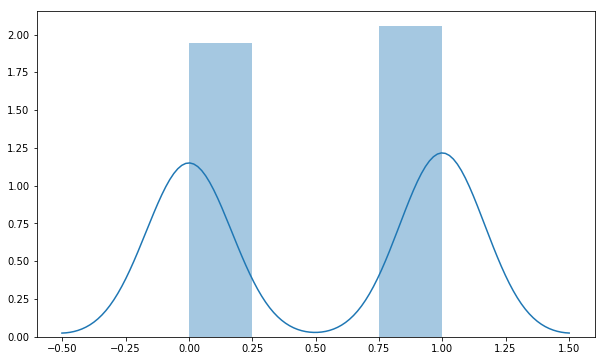

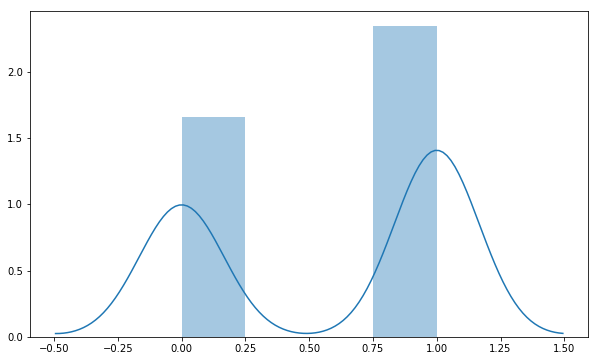

In [109]:
plt.figure(figsize=(10,6))
sns.distplot(lotte['긍정,중립/부정'].tolist())
plt.show()
plt.figure(figsize=(10,6))
sns.distplot(lotte['긍정,중립/부정.1'].tolist())
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


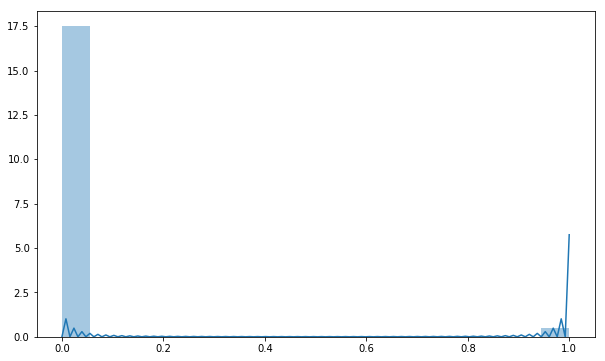

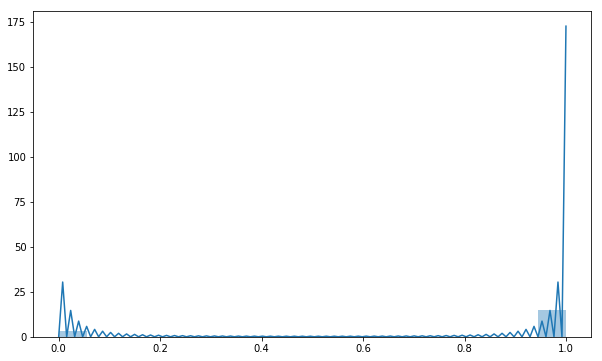

In [110]:
plt.figure(figsize=(10,6))
sns.distplot(samsung['긍정,중립/부정'].tolist())
plt.show()
plt.figure(figsize=(10,6))
sns.distplot(samsung['긍정,중립/부정.1'].tolist())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


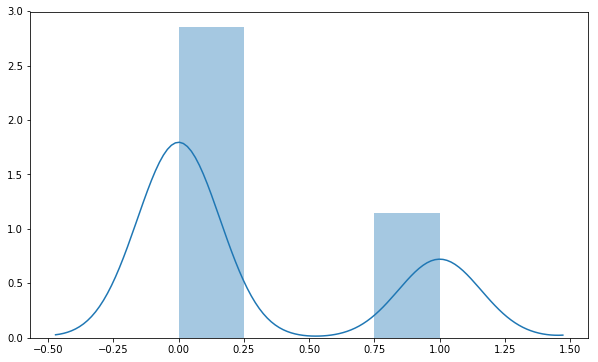

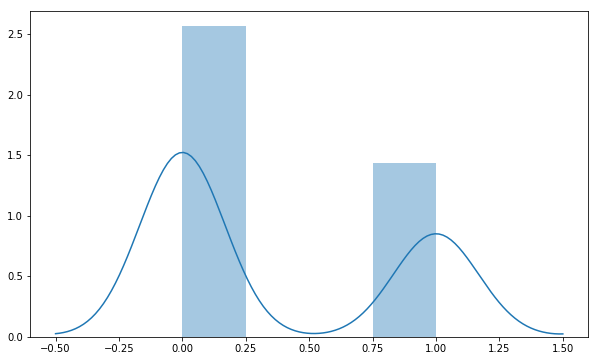

In [111]:
plt.figure(figsize=(10,6))
sns.distplot(hanjin['긍정,중립/부정'].tolist())
plt.show()
plt.figure(figsize=(10,6))
sns.distplot(hanjin['긍정,중립/부정.1'].tolist())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


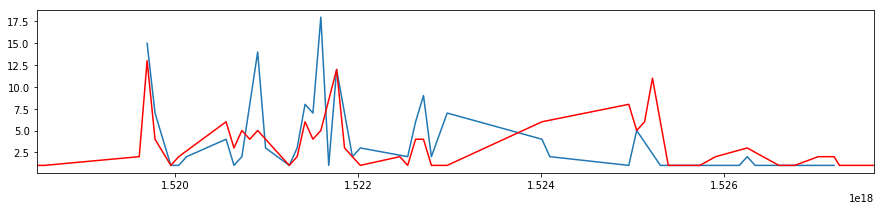

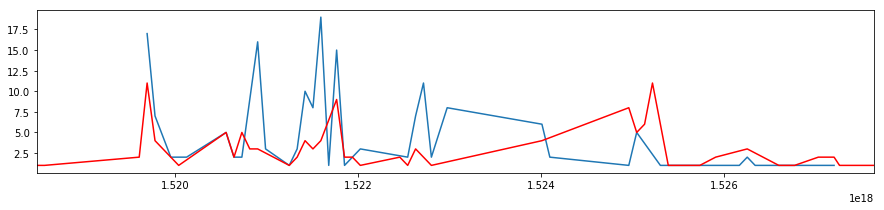

In [135]:
plt.figure(figsize=(15,3))
sns.tsplot(lotte[lotte['긍정,중립/부정']==1]['보도일자'].value_counts().sort_index(),
          lotte[lotte['긍정,중립/부정']==1]['보도일자'].value_counts().sort_index().index)
sns.tsplot(lotte[lotte['긍정,중립/부정']==0]['보도일자'].value_counts().sort_index(),
           lotte[lotte['긍정,중립/부정']==0]['보도일자'].value_counts().sort_index().index, color='r')
plt.show()
plt.figure(figsize=(15,3))
sns.tsplot(lotte[lotte['긍정,중립/부정.1']==1]['보도일자'].value_counts().sort_index(),
          lotte[lotte['긍정,중립/부정.1']==1]['보도일자'].value_counts().sort_index().index)
sns.tsplot(lotte[lotte['긍정,중립/부정.1']==0]['보도일자'].value_counts().sort_index(),
           lotte[lotte['긍정,중립/부정.1']==0]['보도일자'].value_counts().sort_index().index, color='r')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


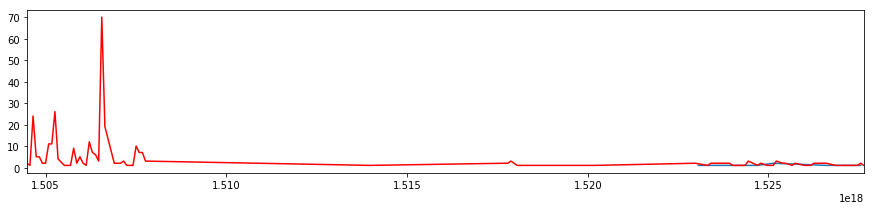

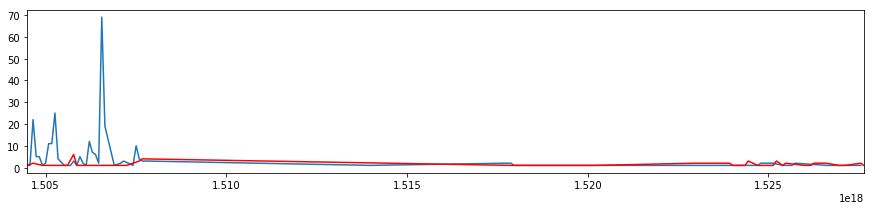

In [154]:
plt.figure(figsize=(15,3))
sns.tsplot(samsung[samsung['긍정,중립/부정']==1]['보도일자'].value_counts().sort_index(),\
          samsung[samsung['긍정,중립/부정']==1]['보도일자'].value_counts().sort_index().index)
sns.tsplot(samsung[samsung['긍정,중립/부정']==0]['보도일자'].value_counts().sort_index(),\
           samsung[samsung['긍정,중립/부정']==0]['보도일자'].value_counts().sort_index().index, color='r',)
plt.figure(figsize=(15,3))
sns.tsplot(samsung[samsung['긍정,중립/부정.1']==1]['보도일자'].value_counts().sort_index(),
          samsung[samsung['긍정,중립/부정.1']==1]['보도일자'].value_counts().sort_index().index)
sns.tsplot(samsung[samsung['긍정,중립/부정.1']==0]['보도일자'].value_counts().sort_index(),
           samsung[samsung['긍정,중립/부정.1']==0]['보도일자'].value_counts().sort_index().index,color='r')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


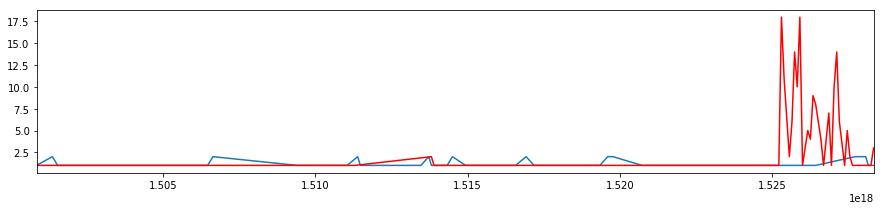

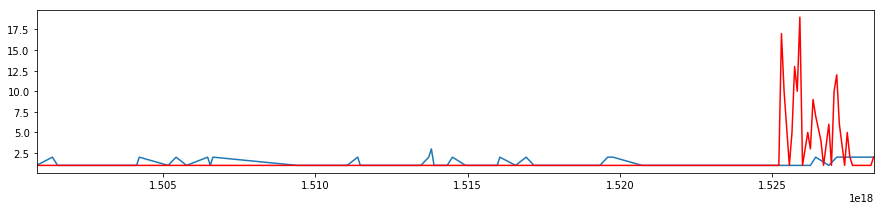

In [139]:
plt.figure(figsize=(15,3))
sns.tsplot(hanjin[hanjin['긍정,중립/부정']==1]['보도일자'].value_counts().sort_index(),\
           time=hanjin[hanjin['긍정,중립/부정']==1]['보도일자'].value_counts().sort_index().index)
sns.tsplot(hanjin[hanjin['긍정,중립/부정']==0]['보도일자'].value_counts().sort_index(),\
           time=hanjin[hanjin['긍정,중립/부정']==0]['보도일자'].value_counts().sort_index().index, color='r')

plt.figure(figsize=(15,3))
sns.tsplot(hanjin[hanjin['긍정,중립/부정.1']==1]['보도일자'].value_counts().sort_index(),\
           time=hanjin[hanjin['긍정,중립/부정.1']==1]['보도일자'].value_counts().sort_index().index)
sns.tsplot(hanjin[hanjin['긍정,중립/부정.1']==0]['보도일자'].value_counts().sort_index(),\
           time=hanjin[hanjin['긍정,중립/부정.1']==0]['보도일자'].value_counts().sort_index().index, color='r')

In [86]:
pd.DataFrame(hanjin[hanjin['긍정,중립/부정']==1]['보도일자'].value_counts().sort_index().reset_index())

,index,보도일자
0,2017-07-10,1
1,2017-07-11,1
2,2017-07-13,1
3,2017-07-17,1
4,2017-07-18,1
5,2017-07-19,1
6,2017-07-24,1
7,2017-07-30,2
8,2017-08-01,1
9,2017-08-06,1


In [4]:
from collections import Counter
from konlpy.tag import Twitter
import pytagcloud

In [15]:
p = [a for a in total[total['긍정,중립/부정.1']=='긍정(중립)']['기사제목(네이버)'].tolist()]
n = [a for a in total[total['긍정,중립/부정.1']=='부정']['기사제목(네이버)'].tolist()]
p = ' '.join(p)
n = ' '.join(n)

In [33]:
nlp = Twitter()
nouns = nlp.nouns(p)
morphs = nlp.pos(p)

In [36]:
count = Counter(nouns)
tag2 = count.most_common(40)
taglist = pytagcloud.make_tags(tag2, maxsize=120)
pytagcloud.create_tag_image(taglist, path+'wordcloud.jpg', size=(650, 450), fontname='Korean', rectangular=True)

In [23]:
nlp = Twitter()
nouns = nlp.nouns(n)
morphs = nlp.pos(p)

In [30]:
count = Counter(nouns)
tag2 = count.most_common(40)
taglist = pytagcloud.make_tags(tag2, maxsize=120)
pytagcloud.create_tag_image(taglist, path+'wordcloud_n.jpg', size=(650, 450), fontname='Korean', rectangular=True)

In [37]:
p = [a for a in total[total['긍정,중립/부정']=='긍정(중립)']['기사제목(네이버)'].tolist()]
n = [a for a in total[total['긍정,중립/부정']=='부정']['기사제목(네이버)'].tolist()]
p = ' '.join(p)
n = ' '.join(n)

In [57]:
nlp = Twitter()
nouns = nlp.nouns(p)
morphs = nlp.pos(p)

In [58]:
count = Counter(nouns)
tag2 = count.most_common(40)
taglist = pytagcloud.make_tags(tag2, maxsize=120)
pytagcloud.create_tag_image(taglist, path+'wordcloud1.jpg', size=(600, 300), fontname='Korean', rectangular=False)

In [59]:
nlp = Twitter()
nouns = nlp.nouns(n)
morphs = nlp.pos(p)

In [68]:
count = Counter(nouns)
tag2 = count.most_common(40)
taglist = pytagcloud.make_tags(tag2, maxsize=120)
pytagcloud.create_tag_image(taglist, path+'wordcloud_n1.jpg', size=(700, 500), fontname='Korean', rectangular=True)